In [1]:
#imports
import katdal
import numpy as np
import matplotlib.pylab as plt
import astropy.coordinates as ac
import functools
import healpy as hp
import optparse
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import healpy as hp
from astropy import units as u
from matplotlib.offsetbox import AnchoredText
import time
import pickle
import sys
Tcmb=2.725
import katcali
import katcali.visualizer as kv
import katcali.models as km
import katcali.rfi as kr
import katcali.solver as ks
import katcali.io as kio
import katcali.label_dump as kl
import katcali.diode as kd
import katcali.filter as kf
import katcali.beam as kb
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.sparse import coo_matrix
import astropy.wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'...')

start @ Wed Aug 10 08:08:18 2022...


In [3]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 14, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])

10.0 0.8 1.5
14.0 1.5 1.5


In [4]:
p_radec=np.loadtxt('radio_source2021.txt')


In [5]:
ch_plot=800

In [6]:
input_file='/idia/projects/hi_im/raw_vis/MeerKLASS2021/level4/data/'
output_file='./'

In [7]:
fname='1631659886'
ant='m010'

print (fname, ant)

1631659886 m010


In [8]:
d1=pickle.load(open(input_file+fname+'_'+ant+'_level4_data','rb'), encoding='latin-1')
print (d1.keys())

dict_keys(['Tresi_map', 'nd_s0', 'Tsky_map', 'ra', 'timestamps', 'Tsky_ratio', 'dec'])


<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>


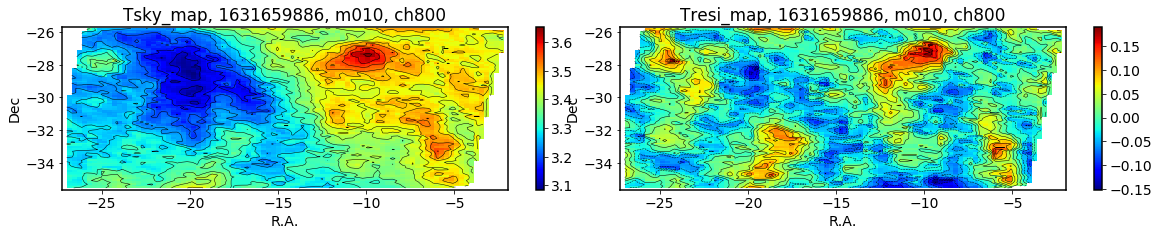

In [9]:


ra=d1['ra']
dec=d1['dec']
Tresi_map=d1['Tresi_map']
Tsky_map=d1['Tsky_map']
nd_s0=d1['nd_s0']
plt.figure(figsize=(20,3))
plt.subplots_adjust (wspace=0.0, hspace=0.2) 
plt.subplot(121)
p_data=Tsky_map[:,ch_plot]
try:
    kv.plot_data(ra,dec, p_data,gsize=90)
except(Exception):
    kv.plot_data(ra,dec, np.zeros_like(ra),gsize=90)
plt.xlabel('R.A.')
plt.ylabel('Dec')
plt.title('Tsky_map, '+fname+', '+ant+', ch'+str(ch_plot))
plt.subplot(122)
p_data=Tresi_map[:,ch_plot]
try:
    kv.plot_data(ra,dec, p_data,gsize=90)
except(Exception):
    kv.plot_data(ra,dec, np.zeros_like(ra),gsize=90)
plt.xlabel('R.A.')
plt.ylabel('Dec')
plt.title('Tresi_map, '+fname+', '+ant+', ch'+str(ch_plot))
plt.show()


In [10]:
freqs=kio.cal_freqs(range(4096))

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>


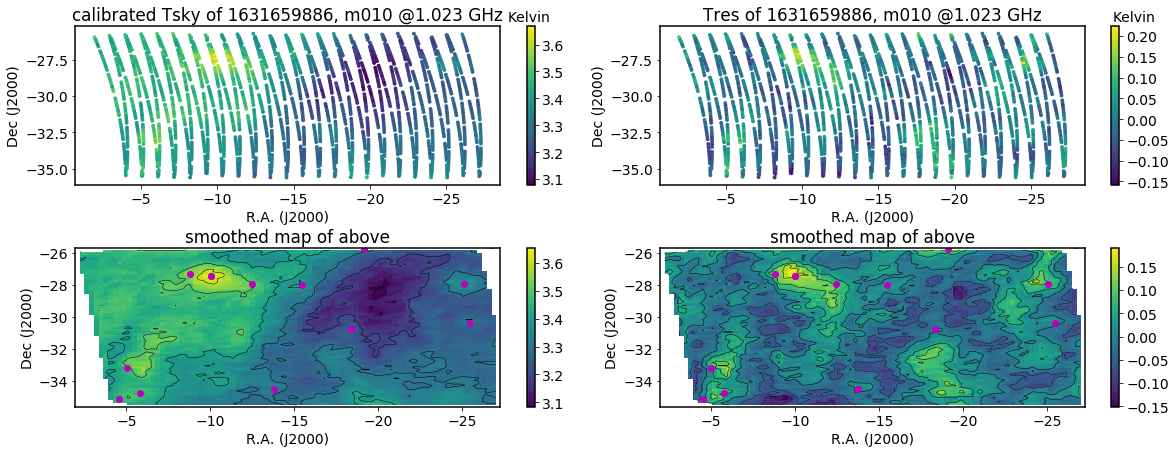

In [11]:
plot_gsize=90
plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.1,hspace=.4)
ax=plt.subplot(221)
p_data=Tsky_map[:,ch_plot]
plt.scatter(ra,dec, c=p_data, vmin=p_data.min(),vmax=p_data.max(), s=8, cmap=kv.cmap1())
ax.invert_xaxis()
plt.title('calibrated Tsky of '+str(fname)+', '+str(ant)+ ' @'+ str(round(freqs[ch_plot]/1e9,3))+' GHz')
plt.xlabel('R.A. (J2000)')
plt.ylabel('Dec (J2000)')
clb = plt.colorbar()
clb.set_label('Kelvin', labelpad=-35, y=1.1, rotation=0)
ax=plt.subplot(222)
p_data=Tresi_map[:,ch_plot]
plt.scatter(ra,dec, c=p_data, vmin=p_data.min(),vmax=p_data.max(), s=8, cmap=kv.cmap1())
ax.invert_xaxis()
plt.title('Tres of '+str(fname)+', '+str(ant)+ ' @'+ str(round(freqs[ch_plot]/1e9,3))+' GHz')
plt.xlabel('R.A. (J2000)')
plt.ylabel('Dec (J2000)')
clb = plt.colorbar()
clb.set_label('Kelvin', labelpad=-35, y=1.1, rotation=0)
ax=plt.subplot(223)
p_data=Tsky_map[nd_s0,ch_plot]
kv.plot_mdata(ra[nd_s0],dec[nd_s0], p_data,gsize=plot_gsize, grid_method='linear', levels=6, x_mask=1, y_mask=2, cmap=kv.cmap1())
ax.invert_xaxis()
plt.plot(p_radec[:,0],p_radec[:,1],'mo')
plt.title('smoothed map of above')
plt.xlabel('R.A. (J2000)')
plt.ylabel('Dec (J2000)')
ax=plt.subplot(224)
p_data=Tresi_map[nd_s0,ch_plot]
kv.plot_mdata(ra[nd_s0],dec[nd_s0], p_data,gsize=plot_gsize, grid_method='linear', levels=6, x_mask=1, y_mask=2, cmap=kv.cmap1())
ax.invert_xaxis()
plt.plot(p_radec[:,0],p_radec[:,1],'mo')
plt.title('smoothed map of above')
plt.xlabel('R.A. (J2000)')
plt.ylabel('Dec (J2000)')
#plt.savefig('F_calibrated_map.pdf', bbox_inches='tight')
plt.show()

In [12]:
#set the sky area to be pixelized 
x_cen=-18 #deg #RA
x_half=20 #deg

y_cen=-34#deg #DEC
y_half=11#deg

pix_deg=0.3

N_half_x=int(x_half/pix_deg)
N_half_y=int(y_half/pix_deg)
Npix_x=2*N_half_x+1
Npix_y=2*N_half_y+1

print (Npix_x,Npix_y)

133 73


In [13]:
p_choice='ZEA'

In [14]:
w = astropy.wcs.WCS(naxis=2)
w.wcs.crval = [x_cen-x_half, y_cen-y_half] # reference pointing of the image #deg
w.wcs.crpix = [1.0, 1.0] # pixel index corresponding to the reference pointing (try either 1 or 0 to see if the behaviour agrees to your expectation!)
w.wcs.cdelt = np.array([pix_deg, pix_deg]) # resolution 
#w.wcs.ctype = ['RA---ZEA', 'DEC--ZEA'] #projection 
#w.wcs.ctype = ['RA---AIT', 'DEC--AIT'] #ref_p0 can't go back to zero
w.wcs.ctype = ['RA---'+p_choice, 'DEC--'+p_choice] 

#other choice: https://docs.astropy.org/en/stable/wcs/
#skyview comment: https://skyview.gsfc.nasa.gov/current/help/fields.html#Projection

In [15]:
print (w)

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Data size  Bounds
        0       None  None
        1       None  None

World Dim  Physical Type  Units
        0  pos.eq.ra
        1  pos.eq.dec

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [16]:
##check the (min ra, min dec) of sky area will fall into pix (0,0)
p0=ac.SkyCoord(ra=(x_cen-x_half)*u.deg, dec=(y_cen-y_half)*u.deg) 
ref_p=skycoord_to_pixel(p0, w)
print (ref_p[0],ref_p[1])
assert(ref_p[0]<1e-12) #should be zero
assert(ref_p[1]<1e-12) #shoule be zero

0.0 0.0


In [17]:
p_list=ac.SkyCoord(ra=ra*u.deg, dec=dec*u.deg) #pointings in observation
x_pix_list,y_pix_list=skycoord_to_pixel(p_list,w) #observation (ra,dec) to pix

x_pix_list=np.round(x_pix_list).astype(int)
y_pix_list=np.round(y_pix_list).astype(int)

In [18]:
#out range due to track data, will filter when add to the map cube
print (np.min(x_pix_list),np.max(x_pix_list),Npix_x)
print (np.min(y_pix_list),np.max(y_pix_list),Npix_y)


26 281 133
-178 189 73


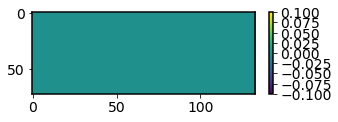

In [19]:
fits_temp=np.zeros([Npix_x,Npix_y,4096])
plt.figure(figsize=(5,1.5))
plt.imshow(fits_temp[:,:,ch_plot].T,aspect='auto')
plt.colorbar()
plt.show()

In [20]:
Sum_Tsky_xy=fits_temp.copy()
Sum_Tresi_xy=fits_temp.copy()
Npix_xy_count1=fits_temp.copy()
Npix_xy_count2=fits_temp.copy()


In [21]:
assert((Tsky_map.mask==Tresi_map.mask).all()==True)

In [22]:
for i in range(len(ra)):
    x_pix,y_pix=x_pix_list[i],y_pix_list[i]
    
    mask1=Tsky_map.mask[i,:]
    if (mask1==True).all()==False:
        Sum_Tsky_xy[x_pix,y_pix,~mask1]+=Tsky_map[i,~mask1]
        Npix_xy_count1[x_pix,y_pix,~mask1]+=1
    
    mask2=Tresi_map.mask[i,:]
    if (mask2==True).all()==False:
        Sum_Tresi_xy[x_pix,y_pix,~mask2]+=Tresi_map[i,~mask2]
        Npix_xy_count2[x_pix,y_pix,~mask2]+=1
   

In [23]:
assert((Npix_xy_count1==Npix_xy_count2).all())

In [24]:
Tsky_xy=Sum_Tsky_xy/Npix_xy_count1
Tresi_xy=Sum_Tresi_xy/Npix_xy_count2

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [25]:
ptr_list=ac.SkyCoord(ra=p_radec[:,0]*u.deg, dec=p_radec[:,1]*u.deg)
ptr_ra_pix,ptr_dec_pix=skycoord_to_pixel(ptr_list,w)

In [26]:
for i in range(len(ptr_list)):
    print (ptr_ra_pix[i],ptr_dec_pix[i])

122.59573834553805 64.1981266400788
92.27751484263372 -15.10722151754861
91.71503150068246 -21.88313749281692
95.89500936180443 -14.437712266189399
104.27618215347712 -4.26095810952049
133.479456266324 52.27740262738033
127.57400947055976 33.20710152373312
127.59048637008033 33.17067786444606
122.3644116396624 18.958736889959287
122.35950932009997 18.946438349190768
102.78459847464687 -19.22346962227637
117.71338433649137 7.615771727708932
127.97261199683504 29.107195323522255
135.87063652386854 47.50596364663346
141.919132371482 43.98272393970099
115.06847079485574 -14.931599272565753
1.1029690827173995 88.01214722387874
2.412480423668921 80.65939390671672
2.427284934596387 45.36900037218954
5.953711397709486 90.4894965483314
6.868574454309066 56.6460824936364
7.8394599921901165 80.25947249861079
8.169954039952668 86.7064800990613
8.706776379925422 88.46257901828524
9.44479361639747 5.730479069184569
15.561932440034994 89.83714144066973
16.868995635226042 90.65661221262292
19.15004447

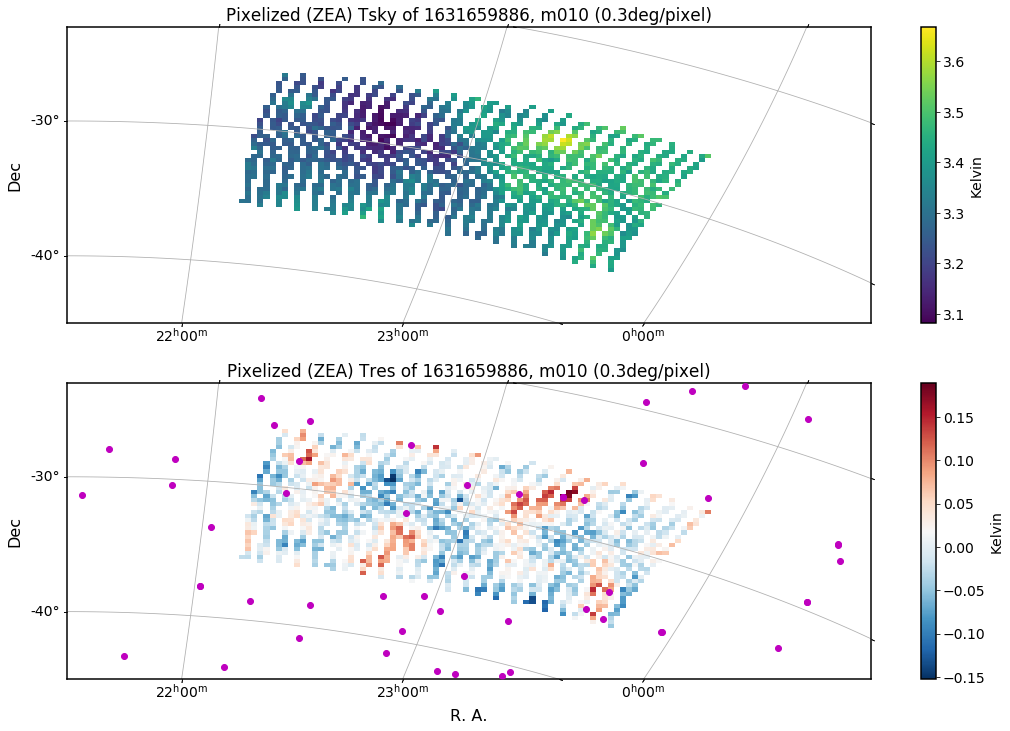

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(211,projection=w)
plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
#plt.gca().invert_yaxis() #only works when no coordinates
plt.colorbar(label='Kelvin')
plt.ylabel('Dec',fontsize=16)
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
plt.grid()
plt.title('Pixelized ('+p_choice+') Tsky of '+fname+', '+ant+' (0.3deg/pixel)')
plt.subplot(212,projection=w)
plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
#plt.gca().invert_yaxis() #only works when no coordinates
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A.',fontsize=16)
plt.ylabel('Dec',fontsize=16)
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
plt.grid()
plt.title('Pixelized ('+p_choice+') Tres of '+fname+', '+ant+' (0.3deg/pixel)')
plt.show()

In [28]:
assert((Npix_xy_count1==Npix_xy_count2).all())


In [29]:
print (w)

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): None

Pixel Dim  Data size  Bounds
        0       None  None
        1       None  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [30]:
list=[Sum_Tsky_xy,Sum_Tresi_xy,Npix_xy_count1,Tsky_xy,Tresi_xy]
list_str=['Sum_Tsky_xy','Sum_Tresi_xy','Npix_xy_count','Tsky_xy','Tresi_xy']
for i in range(len(list)):
    hdu=w.to_fits()
    hdu[0].data=list[i]
    hdu.writeto(output_file+fname+'_'+ant+'_'+list_str[i]+'_p'+str(pix_deg)+'d.fits', overwrite=True)

In [31]:
#end

# reload data to check 

In [32]:
Fits='/idia/projects/hi_im/raw_vis/MeerKLASS2021/level5/data/'+fname+'_'+ant+'_'+list_str[-1]+'_p'+str(pix_deg)+'d.fits'
cube = fits.open(Fits)[0].data
cube = fits.open(Fits)[0].data
print (np.shape(cube))

(133, 73, 4096)


In [33]:
w2=WCS(Fits).dropaxis(-1)
print (w2)

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (133, 73, 4096)

Pixel Dim  Data size  Bounds
        0       4096  None
        1         73  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [34]:
#check data
assert((cube[~np.isnan(cube)]==Tresi_xy[~np.isnan(Tresi_xy)]).all()==True)

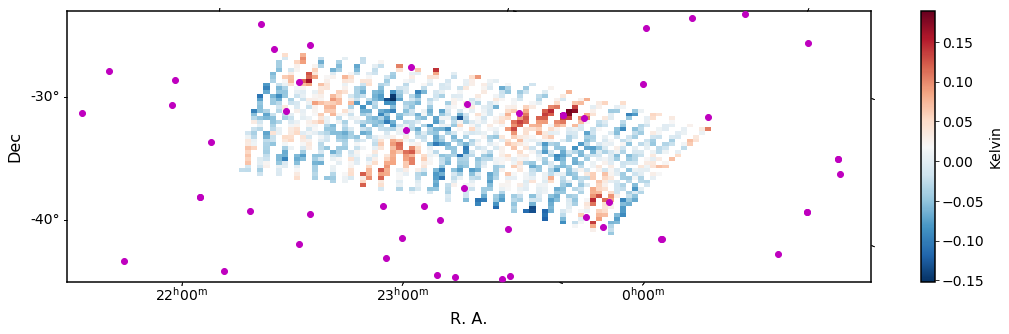

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(projection=w2)
plt.imshow(cube[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A.',fontsize=16)
plt.ylabel('Dec',fontsize=16)
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
plt.show()

In [36]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')

end @ Wed Aug 10 08:08:29 2022#
